# chap01
# chap02
# chap03_1
**本案例为《机器学习实践》课程第三章课件配套代码。主要介绍Sklearn中的回归算法。**

**目录**

* [1. 医疗保险费用数据集](#1)
    * [1.1 数据预处理](#1.1)
    * [1.2 线性回归](#1.2)
    * [1.3 Ridge回归](#1.3)
    * [1.4 Lasso回归](#1.4)
    * [1.5 弹性网络回归](#1.5)
* [2. 模拟数据集](#2)
    * [2.1 RANSAC vs 线性回归](#2.1)
* [3. 电缆数据集](#3)
    * [3.1 数据读取](#3.1)
    * [3.2 K近邻回归](#3.2)
    * [3.3 决策树回归](#3.3)

In [2]:
# 导入pandas
import pandas as pd
file_insurance = './dataSets/data_chap3/insurance.csv'

<a id=1></a>

# 1 医疗保险费用数据集
> **数据介绍：** 数据集包含美国医疗保险费用及被保险人年龄、性别等7个特征，共1338个样本   
**特征说明：**
>> 
|特征|说明|
|---:|---:|
|age|	被保险人的年龄|
|sex|	被保险人的性别|
|bmi|	身体质量指数，等于体重（公斤）除以身高（米）的平方|
|children|	保险计划中所包括的受抚养者数量|
|smoker|	被保险人是否吸烟|
|region|	被保险人的居住区域：northeast、northwest、southeast和southwest|
|charges|	医疗保险费用|


<a id=1.1></a>
## 1.1 数据预处理

### 1.1.1 数据探索

In [3]:
# 读取数据
data1 = pd.read_csv(file_insurance)
# 随机查看
data1.sample(5,random_state=42)

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180


In [4]:
data1.shape

(1338, 7)

In [5]:
# 查看info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1.1.2 非数值型变量编码 
> `sex/smoker/region`列为类别变量而非数值变量，需进行编码:
>> - 将`sex`列`male/female`替换为`1/0`，   
- 将`smoker`列`yes/no`替换为`1/0`，   
- 由于`region`列类别间无序，于是对其应用`One-hot`编码!

In [6]:
#将sex列male/female替换为1/0,int类型
data1['sex'] = data1['sex'].map({'male':1,'female':0}).astype("int")
#将smoker列yes/no替换为1/0，int类型
data1['smoker'] = data1['smoker'].map({'yes':1,'no':0}).astype("int")

In [7]:
#对region列进行one-hot编码
new_data1 = pd.get_dummies(data=data1, columns=['region'], prefix='region')
# 随机查看new_data
new_data1.sample(5,random_state=42)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
764,45,0,25.175,2,0,9095.06825,1,0,0,0
887,36,0,30.020,0,0,5272.17580,0,1,0,0
890,64,0,26.885,0,1,29330.98315,0,1,0,0
1293,46,1,25.745,3,0,9301.89355,0,1,0,0
259,19,1,31.920,0,1,33750.29180,0,1,0,0


### 1.1.3  因果数据分离(X，y)

In [8]:
# X
X = new_data1.drop(['charges'],axis=1)
# y
y = new_data1['charges']
# 随机查看X
X.sample(5,random_state=42)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
764,45,0,25.175,2,0,1,0,0,0
887,36,0,30.020,0,0,0,1,0,0
890,64,0,26.885,0,1,0,1,0,0
1293,46,1,25.745,3,0,0,1,0,0
259,19,1,31.920,0,1,0,1,0,0


### 1.1.4 train-test 数据集分割(0.2)

In [9]:
# 导入train_test_split
from sklearn.model_selection import train_test_split
# train与test划分
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
# 查看划分后数据集大小
print('训练集大小：%s' % len(x_train))
print('测试集大小：%s' % len(x_test))

训练集大小：1070
测试集大小：268


<a id=1.2></a>

## 1.2 线性回归

In [10]:
# 导入LinearRegression
from sklearn.linear_model import LinearRegression
# s1: 实例化模型(构建模型)
lr = LinearRegression()
# s2: 训练
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# s3： 使用训练好的模型预测
y_pred = lr.predict(x_test)

In [12]:
# 输出模型的系数
lr.coef_

array([  257.49024669,  -242.15306559,   321.62189278,   408.06102001,
       23786.48604536,   584.37636275,   188.27979919,  -453.99951691,
        -318.65664503])

In [13]:
# 基于模型系数lr.coef_，构建一个系数Series,系数数值取2位小数
import numpy as np
series_coef = pd.Series(data=np.round(lr.coef_),index=X.columns)
series_coef

age                   257.0
sex                  -242.0
bmi                   322.0
children              408.0
smoker              23786.0
region_northeast      584.0
region_northwest      188.0
region_southeast     -454.0
region_southwest     -319.0
dtype: float64

In [14]:
# s4：效果评估(mse)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

35479352.80730364

In [15]:
# s4：效果评估(决定系数R2)
print('训练集的决定系数为：%s'%round(lr.score(x_train,y_train),4))
print('测试集的决定系数为：%s'%round(lr.score(x_test,y_test),4))

训练集的决定系数为：0.7478
测试集的决定系数为：0.7623


In [16]:
# s4：效果评估(决定系数R2)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)    # 等价于测试集上的 lr.score(x_test,y_test)

0.7623311844057112

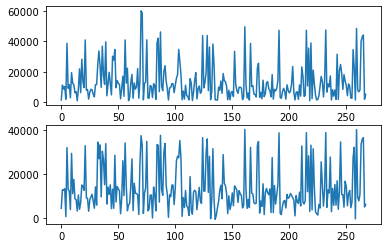

In [17]:
# 图显
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(2,1)
ax[0].plot(np.array(y_test))
ax[1].plot(y_pred)


In [18]:
# 注意一下y_test的类型，需要转成np.array()后，再绘图
type(y_test),type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

<a id=1.3></a>

## 1.3 Ridge回归

### 1.3.1 Ridge模型构建

In [19]:
# S0： 导入Ridge
from sklearn.linear_model import Ridge
# S1： 构造模型,超参alpha=20
rid = Ridge(alpha=20)
# S2： 训练模型
rid.fit(x_train,y_train)
# S3： 使用模型
y_rid_pred = rid.predict(x_test)

print('各自变量系数为：')
pd.Series(data=rid.coef_, index=X.columns)

各自变量系数为：


age                   256.508759
sex                   -88.131471
bmi                   317.568805
children              388.140081
smoker              21322.664777
region_northeast      544.013327
region_northwest      129.953950
region_southeast     -342.254060
region_southwest     -331.713216
dtype: float64

In [20]:
# S4：评估模型
print('训练集决定系数：%s'%round(rid.score(x_train,y_train),4))
print('测试集决定系数：%s'%round(rid.score(x_test,y_test),4))

训练集决定系数：0.741
测试集决定系数：0.754


### 1.3.2 Ridge模型`alpha`调优

In [21]:
import numpy as np
# 创建一个基为e，首项为e，末项为e^20的等比数列，使用np.logspace()
alphas = np.logspace(1,20,20,base=np.exp(1))
alphas

array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
       1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03, 2.20264658e+04, 5.98741417e+04, 1.62754791e+05,
       4.42413392e+05, 1.20260428e+06, 3.26901737e+06, 8.88611052e+06,
       2.41549528e+07, 6.56599691e+07, 1.78482301e+08, 4.85165195e+08])

In [22]:
#创建一个DataFrame以整合结果
coef_rid = pd.DataFrame()
#计算各惩罚系数下的各自变量系数
for alpha in alphas:
    rid = Ridge(alpha=alpha)
    rid.fit(x_train,y_train)
    df = pd.DataFrame([rid.coef_], columns=X.columns)
    #为便于观察结果，我们将alpha以对数形式显示
    df['log(alpha)'] = np.log(alpha)
    coef_rid = coef_rid.append(df,ignore_index=True)
    
coef_rid.head(10)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha)
0,257.345448,-217.937430,321.001661,405.132398,23418.537524,578.529887,179.190089,-436.690555,-321.029421,1.0
1,257.105555,-178.948312,319.991039,400.273497,22812.313378,568.762187,164.498207,-408.637525,-324.622869,2.0
2,256.504943,-87.579503,317.553743,388.062271,21313.227673,543.853023,129.742387,-341.845440,-331.749970,3.0
3,255.172296,82.563931,312.621483,360.622112,18085.809351,486.194718,63.162957,-211.574652,-337.783023,4.0
4,252.852861,268.032574,305.559312,310.656464,12818.737802,377.745925,-17.199640,-45.566423,-314.979862,5.0
5,250.048105,303.332431,299.055763,241.140497,7161.229387,234.809780,-54.212444,50.956702,-231.554038,6.0
6,247.576506,196.694532,292.642667,162.769129,3257.690239,114.458486,-41.554080,53.337171,-126.241577,7.0
7,245.064552,93.116313,280.046624,90.588470,1312.873259,46.339189,-21.298992,30.361042,-55.401239,8.0
8,240.332424,38.221195,251.289175,41.659995,500.495949,16.422000,-9.792790,15.099289,-21.728499,9.0
9,228.213198,14.890372,197.074096,16.990855,186.542067,5.070417,-4.546824,7.550947,-8.074540,10.0


In [23]:
#绘图基本设置
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   # 显示中文
plt.rcParams['axes.unicode_minus']=False       # 用来正常显示负号
%matplotlib inline

In [24]:
plt.plot?
# **Plotting labelled data**: plot('xlabel', 'ylabel', data=obj)

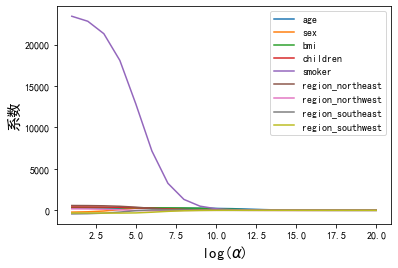

In [25]:
# 绘制各个系数的变化趋势图
## 遍历每一个特征->绘图'log(alpha)'与每个特征的折线图
for feature in X.columns:
    plt.plot('log(alpha)',feature,data=coef_rid)
    
plt.legend()
plt.xlabel(r'log($\alpha$)',fontsize=15)
plt.ylabel('系数',fontsize=15)
plt.show()

**分析：** 从图上可发现`smoker`系数相对其他系数过大，导致无法观测各系数的收敛情况，因此对各系数做如下处理，
> + $log\_coef = np.sign(coef) * np.log(np.abs(coef)+1)$ 

> + `np.log1p(x)` --> `log(x+1)`

In [26]:
# 转换实例：np.exp()与np.log()互逆
coef_rid['alpha'] = np.exp(coef_rid['log(alpha)'])
coef_rid['alpha']

0     2.718282e+00
1     7.389056e+00
2     2.008554e+01
3     5.459815e+01
4     1.484132e+02
5     4.034288e+02
6     1.096633e+03
7     2.980958e+03
8     8.103084e+03
9     2.202647e+04
10    5.987414e+04
11    1.627548e+05
12    4.424134e+05
13    1.202604e+06
14    3.269017e+06
15    8.886111e+06
16    2.415495e+07
17    6.565997e+07
18    1.784823e+08
19    4.851652e+08
Name: alpha, dtype: float64

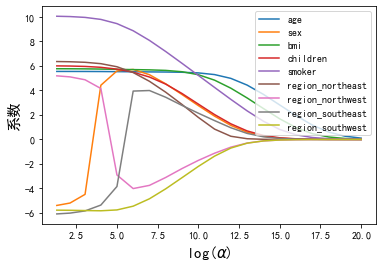

In [27]:
#绘图 log(X+1)图
## (1) 先将横轴升级成指数np.exp()以便后续np.log(),即先放后缩以保证横轴的间隔不变
coef_rid['alpha'] =  np.exp(coef_rid['log(alpha)'])
## (2) 使用np.log()将coef_rid转成log_coef_rid
### (2_1)利用对数对纵轴值进行缩放
log_coef_rid = np.sign(coef_rid) * np.log(np.abs(coef_rid)+1)
### (2_2)遍历每个特征并绘图,可以查看一下X.columns的内容
for feature in X.columns:
    plt.plot('alpha',feature,data=log_coef_rid)
    
plt.legend(loc='upper right')
plt.xlabel(r'log($\alpha$)',fontsize=15)
plt.ylabel('系数',fontsize=15)
plt.show()

In [28]:
# 查看DF系数coef_rid的前5行
coef_rid.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha),alpha
0,257.345448,-217.937430,321.001661,405.132398,23418.537524,578.529887,179.190089,-436.690555,-321.029421,1.0,2.718282
1,257.105555,-178.948312,319.991039,400.273497,22812.313378,568.762187,164.498207,-408.637525,-324.622869,2.0,7.389056
2,256.504943,-87.579503,317.553743,388.062271,21313.227673,543.853023,129.742387,-341.845440,-331.749970,3.0,20.085537
3,255.172296,82.563931,312.621483,360.622112,18085.809351,486.194718,63.162957,-211.574652,-337.783023,4.0,54.598150
4,252.852861,268.032574,305.559312,310.656464,12818.737802,377.745925,-17.199640,-45.566423,-314.979862,5.0,148.413159


In [29]:
# 查看DF系数log_coef_rid的前5行
log_coef_rid.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha),alpha
0,5.554298,-5.388786,5.774557,6.006679,10.061326,6.362217,5.194012,-6.081512,-5.774643,0.693147,1.313262
1,5.553369,-5.192670,5.771413,5.994643,10.035100,6.345219,5.108960,-6.015273,-5.785740,1.098612,2.126928
2,5.551039,-4.483900,5.763791,5.963739,9.967130,6.300516,4.873229,-5.837280,-5.807391,1.386294,3.048587
3,5.545850,4.425612,5.748187,5.890600,9.802938,6.188664,4.161426,-5.359293,-5.825360,1.609438,4.018150
4,5.536755,5.594832,5.725411,5.741902,9.458741,5.936866,-2.901402,-3.840880,-5.755678,1.791759,5.006715


↑♎注意：`log_coef_rid`中的特征`log(alpha)`没有参与制图。

<a id=1.4></a>

## 1.4 Lasso回归

### 1.4.1 Lasso模型构建

In [30]:
# S0: 导入模块
from sklearn.linear_model import Lasso
# S1: 模型构造,alpha=0.1
las = Lasso(alpha=0.1)
# S2: 模型训练
las.fit(x_train,y_train)
# S3: 模型预测
y_las_pred = las.predict(x_test)

print('各自变量系数为：')
pd.Series(data=las.coef_,index=X.columns)

各自变量系数为：


age                   257.491172
sex                  -241.697933
bmi                   321.600541
children              407.988229
smoker              23785.804615
region_northeast      868.264429
region_northwest      472.175816
region_southeast     -169.214597
region_southwest      -33.919381
dtype: float64

In [31]:
#模型效果评估
print('训练集决定系数：%s'%round(las.score(x_train,y_train),4))
print('测试集决定系数：%s'%round(las.score(x_test,y_test),4))

训练集决定系数：0.7478
测试集决定系数：0.7623


### 1.4.2 Lasso模型参数调优

In [32]:
import numpy as np
#创建一个基为e，首项为e，末项为e^15的等比数列，
alphas = np.logspace(1,15,15,base=np.exp(1))
#创建一个DataFrame以整合结果
coef_las = pd.DataFrame()
#计算各惩罚系数下的各自变量系数
for alpha in alphas:
    las = Lasso(alpha=alpha)
    las.fit(x_train,y_train)
    df = pd.DataFrame([np.round(las.coef_,2)],columns=X.columns)
    #为便于观察结果，我们将alpha以对数形式显示
    df['log(alpha)'] = np.log(alpha)
    coef_las = coef_las.append(df, ignore_index=True)
coef_las.head(10)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha)
0,257.50,-229.96,321.03,406.08,23767.96,849.12,453.23,-164.92,-30.84,1.0
1,257.51,-209.02,320.02,402.67,23736.12,814.96,419.44,-157.27,-25.35,2.0
2,257.55,-152.03,317.26,393.40,23649.58,722.14,327.58,-136.47,-10.40,3.0
3,257.64,-0.00,309.83,368.31,23414.57,440.62,48.51,-109.50,-0.00,4.0
4,257.38,-0.00,300.02,295.97,22830.55,0.00,0.00,-0.00,-0.00,5.0
5,255.97,-0.00,292.92,111.13,21257.39,0.00,0.00,-0.00,-0.00,6.0
6,251.38,0.00,274.39,0.00,17003.02,0.00,0.00,-0.00,-0.00,7.0
7,238.34,0.00,224.59,0.00,5455.35,0.00,-0.00,0.00,-0.00,8.0
8,216.02,0.00,92.48,0.00,0.00,0.00,-0.00,0.00,-0.00,9.0
9,149.35,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,10.0


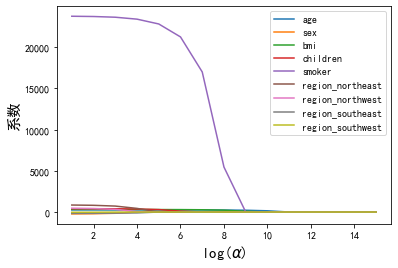

In [33]:
#绘图
import matplotlib.pyplot as plt
%matplotlib inline

for feature in X.columns:
    plt.plot('log(alpha)',feature,data=coef_las)
plt.legend()
plt.xlabel(r'log($\alpha$)',fontsize=15)
plt.ylabel('系数',fontsize=15)
plt.show()

↑♎分析：从图上可发现`smoker`系数相对其他系数过大，导致无法观测各系数的收敛情况，因此对各系数做处理

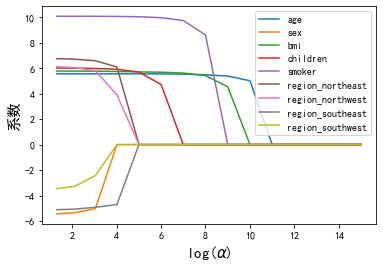

In [34]:
#绘图
coef_las['alpha'] = np.exp(coef_las['log(alpha)'])
import matplotlib.pyplot as plt
%matplotlib inline
#利用对数对纵轴值进行缩放
log_coef_las = np.sign(coef_las) * np.log(np.abs(coef_las)+1)
for feature in X.columns:
    plt.plot('alpha',feature,data=log_coef_las)
plt.legend()
plt.xlabel(r'log($\alpha$)',fontsize=15)
plt.ylabel('系数',fontsize=15)
plt.show()

In [35]:
# 查看DF系数coef_las的前5行
coef_las.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha),alpha
0,257.50,-229.96,321.03,406.08,23767.96,849.12,453.23,-164.92,-30.84,1.0,2.718282
1,257.51,-209.02,320.02,402.67,23736.12,814.96,419.44,-157.27,-25.35,2.0,7.389056
2,257.55,-152.03,317.26,393.40,23649.58,722.14,327.58,-136.47,-10.40,3.0,20.085537
3,257.64,-0.00,309.83,368.31,23414.57,440.62,48.51,-109.50,-0.00,4.0,54.598150
4,257.38,-0.00,300.02,295.97,22830.55,0.00,0.00,-0.00,-0.00,5.0,148.413159


In [36]:
# 查看DF系数log_coef_las的前5行
log_coef_las.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,log(alpha),alpha
0,5.554896,-5.442245,5.774645,6.009010,10.076136,6.745378,6.118604,-5.111506,-3.460723,0.693147,1.313262
1,5.554934,-5.347203,5.771503,6.000598,10.074795,6.704365,6.041302,-5.064302,-3.271468,1.098612,2.126928
2,5.555089,-5.030634,5.762869,5.977366,10.071143,6.583603,5.794780,-4.923406,-2.433613,1.386294,3.048587
3,5.555437,0.000000,5.739246,5.911636,10.061156,6.090450,3.902175,-4.705016,0.000000,1.609438,4.018150
4,5.554431,0.000000,5.707177,5.693631,10.035899,0.000000,0.000000,0.000000,0.000000,1.791759,5.006715


↑♎分析：对于以上两个DF的特征值

<a id=1.5></a>

## 1.5 弹性网络回归

In [37]:
# 导入模型
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=1,l1_ratio=0.5)
EN.fit(x_train,y_train)
print('训练集决定系数：%s'% np.round(EN.score(x_train,y_train),4))
print('测试集决定系数：%s'% np.round(EN.score(x_test,y_test),4))

训练集决定系数：0.3888
测试集决定系数：0.4009


<a id=2></a>
# 2 模拟数据集
<a id=2.1></a>
## 2.1 RANSAC vs 线性回归
> RANdom SAmple Consensus    
> 为体现RANSAC相比于线性回归的优势，我们创建一个包含部分离群强影响点的数据集

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,RANSACRegressor
from sklearn import datasets

plt.rcParams['font.sans-serif'] = ['SimHei']   # 显示中文
plt.rcParams['axes.unicode_minus']=False       # 用来正常显示负号
%matplotlib inline

n_samples = 2000
n_outliers = 200
#创建用于一元回归的数据
X,Y,coef = datasets.make_regression(n_samples=n_samples,n_features=1,n_informative=1,noise=20,random_state=1,coef=True)
#添加噪音数据
X[:n_outliers] = 3 + 0.5*np.random.normal(size=(n_outliers,1))
Y[:n_outliers] = -3 + np.random.normal(size=n_outliers)

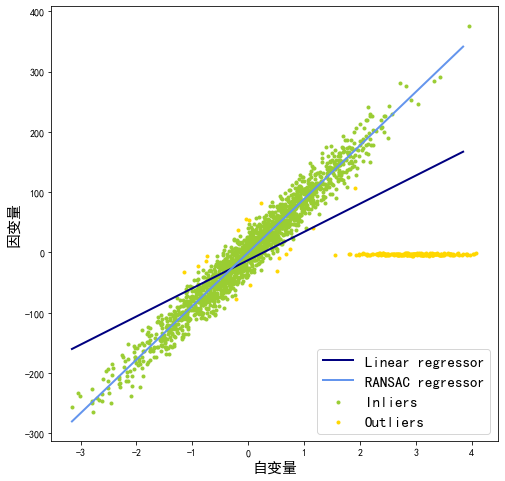

未添加噪音数据的线性回归系数: 87.91985605365954
添加噪音数据的线性回归系数: [46.72908698]
添加噪音数据的RANSAC回归系数: [88.78617554]


In [39]:
#线性回归
lr = LinearRegression()
lr.fit(X,Y)
#RANSAC回归
RAN = RANSACRegressor(random_state=1)
RAN.fit(X,Y)
# 获取内点与外点
inlier = RAN.inlier_mask_
outlier = np.logical_not(inlier)

#生成两个回归模型的预测结果
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
lr_Y = lr.predict(line_X)
RAN_Y = RAN.predict(line_X)

#绘图
fig = plt.figure(figsize=(8,8))
plt.scatter(X[inlier], Y[inlier], color='yellowgreen', marker='.',label='Inliers')
plt.scatter(X[outlier], Y[outlier], color='gold', marker='.',label='Outliers')
plt.plot(line_X, lr_Y, color='navy', linewidth=2, label='Linear regressor')
plt.plot(line_X, RAN_Y, color='cornflowerblue', linewidth=2,label='RANSAC regressor')
plt.legend(loc='lower right',fontsize=15)
plt.xlabel('自变量',fontsize=15)
plt.ylabel('因变量',fontsize=15)
plt.show()
#输出两模型自变量系数
print('未添加噪音数据的线性回归系数:', coef)
print('添加噪音数据的线性回归系数:', lr.coef_)
print('添加噪音数据的RANSAC回归系数:', RAN.estimator_.coef_)

<a id=3></a>

# 3 非线性回归方法
> 用分类的方法做回归
- **K近邻回归**
- **支持向量回归（SVR）**
- **决策树回归**
- 样条回归  
- 径向基网络 
- 高斯过程


<a id=3.1></a>

## 3.1 数据探索
> 电缆数据集:
>> + 来自KEEL [Electrical Length]，共495个样本，
>> + 特征`X`:住户数量和电缆传输距离； 目标`y`:电缆的电长度
>> + 利用该数据集，我们可基于两个特征预测电缆的总长度。

|特征|说明|
|---:|---:|
|Inhabitants|住户数量|
|Distance|电缆传输距离|
|Electrical Length|电缆的电长度|

In [40]:
# 电缆数据集
import pandas as pd
file_electric = './dataSets/data_chap3/Electrical_Length.csv'

In [41]:
# 读取数据，查看数据
data2 = pd.read_csv(file_electric)
data2.sample(5,random_state=10)

,Inhabitants,Distance,Length
275,41,926.669983,3552
343,55,420.000000,1520
152,130,668.330017,5589
304,35,330.000000,1084
146,15,563.330017,2010


In [42]:
# 探索数据info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
Inhabitants    495 non-null int64
Distance       495 non-null float64
Length         495 non-null int64
dtypes: float64(1), int64(2)
memory usage: 11.7 KB


In [43]:
# 探索数据describe
data2.describe()

,Inhabitants,Distance,Length
count,495.000000,495.000000,495.000000
mean,35.262626,498.855152,1726.428283
std,30.969485,249.865583,1154.450763
min,1.000000,60.000000,80.000000
25%,16.000000,323.329987,911.500000
50%,27.000000,460.000000,1491.000000
75%,45.000000,633.330017,2211.000000
max,320.000000,1673.329956,7675.000000


In [44]:
print(type(data2[['Distance']]))
data2[['Distance']].head()

<class 'pandas.core.frame.DataFrame'>


,Distance
0,605.000000
1,696.669983
2,443.329987
3,373.329987
4,340.000000


In [45]:
print(type(data2['Distance']))
data2[['Distance']].head()

<class 'pandas.core.series.Series'>


,Distance
0,605.000000
1,696.669983
2,443.329987
3,373.329987
4,340.000000


**数据X,y分离，train与test分割**

In [46]:
# 分离X，y
y = data2['Length']
X = data2.drop('Length',axis=1)

# 导入train_test_split，train:test=8:2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

<a id=3.2></a>

## 3.2 K近邻回归

### 3.2.1 Modle:KneighborsRegressor

In [47]:
# 导入KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
# s1: 模型构造
KNR = KNeighborsRegressor()
# s2: 模型训练
KNR.fit(x_train,y_train)
# s3: 模型预测
y_pred_KNR = KNR.predict(x_test)
# s4: 模型评价
print('训练集决定系数(4位小数点)：%s'%round(KNR.score(x_train,y_train),4))
print('测试集决定系数(4位小数点)：%s'%round(KNR.score(x_test,y_test),4))

训练集决定系数(4位小数点)：0.7738
测试集决定系数(4位小数点)：0.7237


In [48]:
round()?
# 函数将数字四舍五入到指定的位数

SyntaxError: invalid syntax (<ipython-input-48-f4a8c449e54a>, line 1)

### 3.2.2 ParametersOptimizing:Grid-searching
> 调整两个重要参数
- n_neighbors:`[2,3,4,...14]`
- weights:`['uniform','distance']`

In [49]:
KNeighborsRegressor?

In [50]:
np.linspace?
#用于在线性空间中以均匀步长生成数字序列
#numpy.linspace(start, end, num=num_points)
#在start和end之间生成一个统一的序列，共有num_points个元素。

In [51]:
# 生成超参的元组列表，因为有两个超参，所以使用元组的形式
neighbors = np.linspace(2,15,14).astype(int)
weights = ['uniform','distance']
# 构造超参列表，列表中每个元素为一个tuple
parameters = [(neighbor,weight) for neighbor in neighbors for weight in weights]
parameters[:5]

[(2, 'uniform'),
 (2, 'distance'),
 (3, 'uniform'),
 (3, 'distance'),
 (4, 'uniform')]

In [52]:
dict()
#用于创建一个字典。

{}

In [53]:
# grid searching，并记录score 
## 构造评分dict
test_score = dict()
## 遍历超参 -> 构造、训练、评估模型 -> 记录评估结果到评分dict
for parameter in parameters:
    KNR = KNeighborsRegressor(n_neighbors=parameter[0],weights=parameter[1]).fit(x_train,y_train)
    test_score[parameter] = KNR.score(x_test,y_test)

In [54]:
pd.DataFrame()?
#pd.DataFrame   单元格可以存放数值、字符串等
#(
#list(test_score.items()),   第一个参数是存放在DataFrame里的数据
#columns=['parameter','test_score']   columns列名
#)
sort_values()
#DataFrame.sort_values  排序函数
#(
#by=‘##’,             指定列名
#axis=0,                若axis=0或’index’，则按照指定列中数据大小排序；
#                       若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
#ascending=True,        是否按指定列的数组升序排列，默认为True，即升序排列
#inplace=False,         是否用排序后的数据集替换原来的数据，默认为False，即不替换
#na_position=‘last’、 first或last，设定缺失值的显示位置
#)

SyntaxError: invalid syntax (<ipython-input-54-7bc3b06cc9f1>, line 1)

In [55]:
# 整理结果到DF并输出
k_result = pd.DataFrame(list(test_score.items()),columns=['parameter','test_score']).sort_values(by='test_score',ascending=False)
k_result.reset_index(drop=True)[:5]

,parameter,test_score
0,"(15, uniform)",0.779680
1,"(14, uniform)",0.775354
2,"(13, uniform)",0.774687
3,"(15, distance)",0.767806
4,"(14, distance)",0.765607


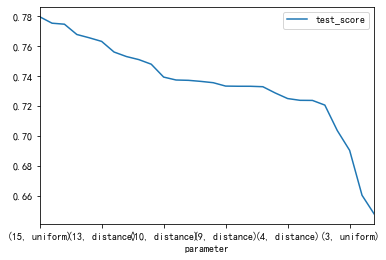

In [56]:
# 可视化
k_result.plot(x='parameter',y='test_score')

↑♎分析：自己分析以上结果，给出结论

<a id=3.3></a>
## 3.3 决策树回归

### 3.3.1 Model: DecisionTreeRegressor

In [57]:
# s1: 导入模型DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# s1: 模型构造
Tree = DecisionTreeRegressor(max_depth=5)
# s2: 模型训练
Tree.fit(x_train,y_train)
# s3: 模型预测
y_pred_Tree = Tree.predict(x_test)
# s4: 模型评估
print('训练集决定系数：%s'%round(Tree.score(x_train,y_train),4))
print('测试集决定系数：%s'%round(Tree.score(x_test,y_test),4))
print('特征重要性：%s'%Tree.feature_importances_)

训练集决定系数：0.8345
测试集决定系数：0.6971
特征重要性：[0.26407354 0.73592646]


### 3.3.2 ParametersOptimizing:List-searching
> 调整一个重要参数
- max_depth:`[2,3,4,...14]`

In [61]:
# 调参
## 构造超参列表
max_depths = np.linspace(2,15,14).astype(int)
## 构造评分dict
test_score={}
## 遍历超参 -> 构造、训练、评估模型 -> 记录评估结果到评分dict
for n in max_depths:
    test_score[n] = DecisionTreeRegressor(max_depth=n).fit(x_train,y_train).score(x_test,y_test)

In [62]:
# 整理结果到DF并输出
tree_result = pd.DataFrame(list(test_score.items()),columns=['max_depth','test_score'])\
                            .sort_values(by='test_score',ascending=False)
tree_result.reset_index(drop=True)[:5]

,max_depth,test_score
0,4,0.726542
1,6,0.705437
2,5,0.697132
3,8,0.679409
4,3,0.669781


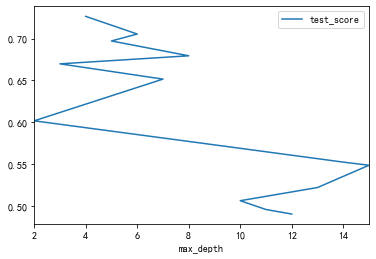

In [63]:
# 可视化
tree_result.plot(x='max_depth',y='test_score')

↑♎分析：自己分析以上结果，给出结论